In [20]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import backtrader as bt
import datetime
import pandas as pd
import pdb

import matplotlib
%matplotlib inline

In [24]:
data = bt.feeds.YahooFinanceData(dataname='VUSA.DE',period='d', fromdate=datetime.datetime(2019,1,1),
                                todate=datetime.datetime(2019,3,1))

In [25]:
first_bdays = pd.bdate_range('2010-01-01', datetime.date.today(), freq='BMS')

In [26]:
datetime.datetime(2020,8,1) in first_bdays

False

In [2]:
# Create a Stratey
MONTHLY_INVESTMENT = 200
class TestStrategy(bt.Strategy):
    
    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        cur_datetime = self.datetime.date(ago=0)
        if cur_datetime in first_bdays:
            self.log('buying on {}'.format(cur_datetime))
            size = int(MONTHLY_INVESTMENT / self.data)
            self.log('size: {}'.format(size))
            # if first day of month, buy VUSA.DE (200 EUR)

            self.buy(size=size,)

NameError: name 'bt' is not defined

In [32]:
    cerebro = bt.Cerebro()
    
    # Add a strategy
    cerebro.addstrategy(TestStrategy)
    cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio')
    
    cerebro.broker.setcash(100.0)
    cerebro.adddata(data)
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    results = cerebro.run()

    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100.00
2019-01-02, Close, 41.82
2019-01-03, Close, 41.15
2019-01-04, Close, 41.82
2019-01-07, Close, 42.25
2019-01-08, Close, 42.31
2019-01-09, Close, 42.55
2019-01-10, Close, 42.67
2019-01-11, Close, 42.80
2019-01-14, Close, 42.71
2019-01-15, Close, 43.30
2019-01-16, Close, 43.65
2019-01-17, Close, 43.70
2019-01-18, Close, 44.57
2019-01-21, Close, 44.46
2019-01-22, Close, 44.24
2019-01-23, Close, 43.85
2019-01-24, Close, 44.15
2019-01-25, Close, 44.37
2019-01-28, Close, 43.70
2019-01-29, Close, 43.80
2019-01-30, Close, 44.21
2019-01-31, Close, 44.74
2019-02-01, Close, 44.85
2019-02-01, buying on 2019-02-01
2019-02-01, size: 4
2019-02-01, BUY CREATE, 44.85
2019-02-04, Close, 45.07
2019-02-05, Close, 45.49
2019-02-06, Close, 45.58
2019-02-07, Close, 44.99
2019-02-08, Close, 45.04
2019-02-11, Close, 45.61
2019-02-12, Close, 46.03
2019-02-13, Close, 46.30
2019-02-14, Close, 46.15
2019-02-15, Close, 46.67
2019-02-18, Close, 46.67
2019-02-19, Close, 46.58
2019-02-2

In [22]:
strat = results[0]
pyfoliozer = strat.analyzers.getbyname('pyfolio')
returns, positions, transactions, gross_lev = pyfoliozer.get_pf_items()

Entire data start date: 2019-01-02
Entire data end date: 2019-01-31


Backtest Months: 1


/Users/gabrielfior/miniconda3/envs/pyfolio35/lib/python3.5/site-packages/pyfolio/timeseries.py:416: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  beta, alpha = sp.stats.linregress(factor_returns.loc[ret_index].values,


Performance statistics,Backtest
annual_return,0.63
annual_volatility,0.08
sharpe_ratio,6.32
calmar_ratio,48.32
stability_of_timeseries,0.90
max_drawdown,-0.01
omega_ratio,2.96
sortino_ratio,10.31
skew,-0.95
kurtosis,1.85


/Users/gabrielfior/miniconda3/envs/pyfolio35/lib/python3.5/site-packages/pyfolio/plotting.py:688: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  bmark_vol = factor_returns.loc[returns.index].std()
/Users/gabrielfior/miniconda3/envs/pyfolio35/lib/python3.5/site-packages/numpy/core/fromnumeric.py:1033: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return argmin(axis, out)


Worst Drawdown Periods,net drawdown in %,peak date,valley date,recovery date,duration
0,1.29,2019-01-25,2019-01-28,2019-01-31,5
1,0.79,2019-01-18,2019-01-23,2019-01-25,6
2,0.09,2019-01-11,2019-01-14,2019-01-15,3
3,0.00,2019-01-02,2019-01-02,2019-01-02,1
4,0.00,2019-01-02,2019-01-02,2019-01-02,1




[-0.008 -0.003]


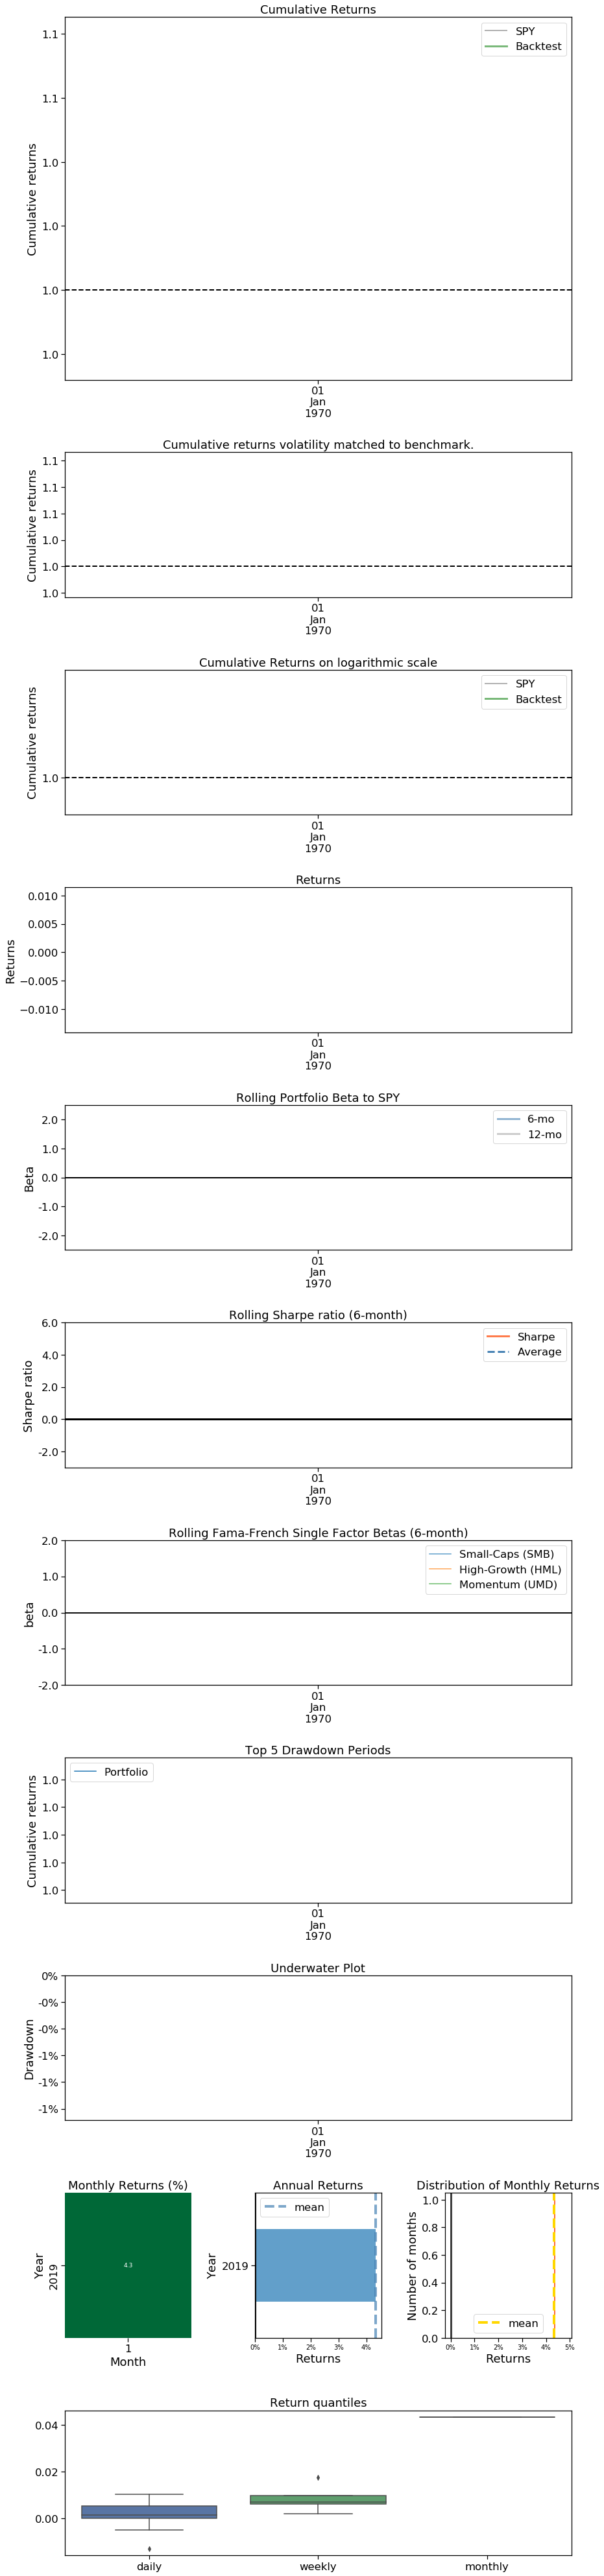

Stress Events,mean,min,max
New Normal,0.19%,-1.29%,1.03%


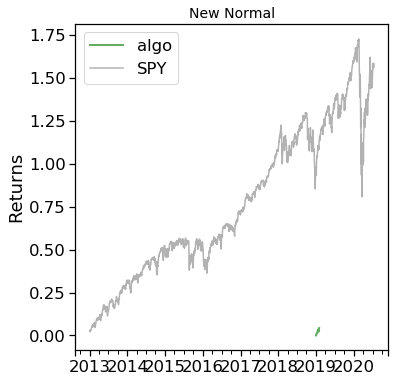

Top 10 long positions of all time,max
VUSA,85.77%


Top 10 short positions of all time,max


Top 10 positions of all time,max
VUSA,85.77%


All positions ever held,max
VUSA,85.77%


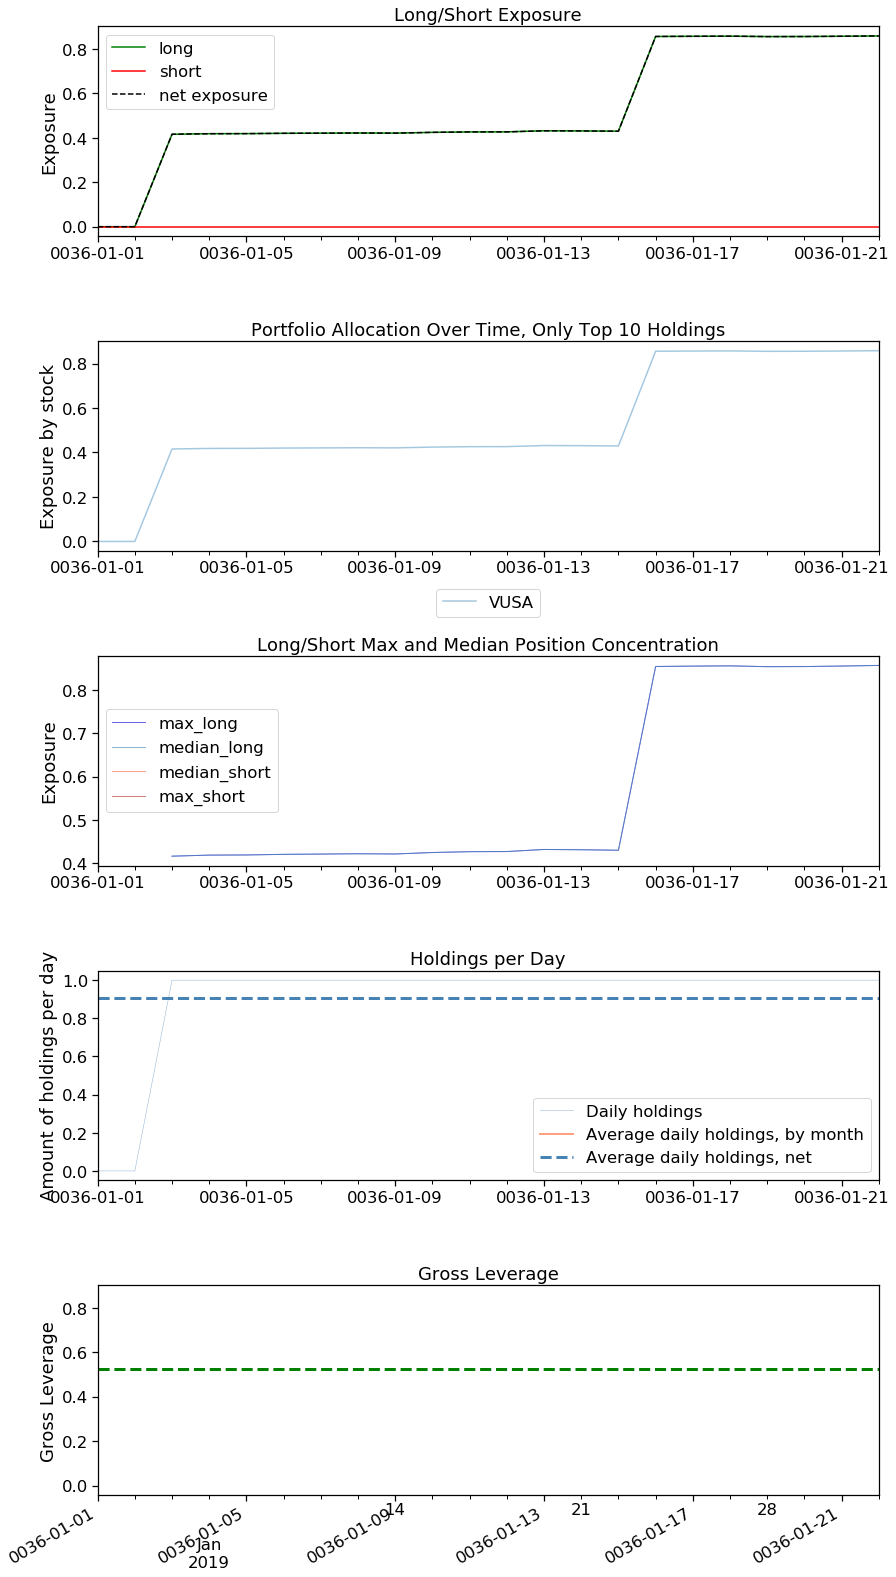

/Users/gabrielfior/miniconda3/envs/pyfolio35/lib/python3.5/site-packages/pyfolio/plotting.py:1210: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  **kwargs)


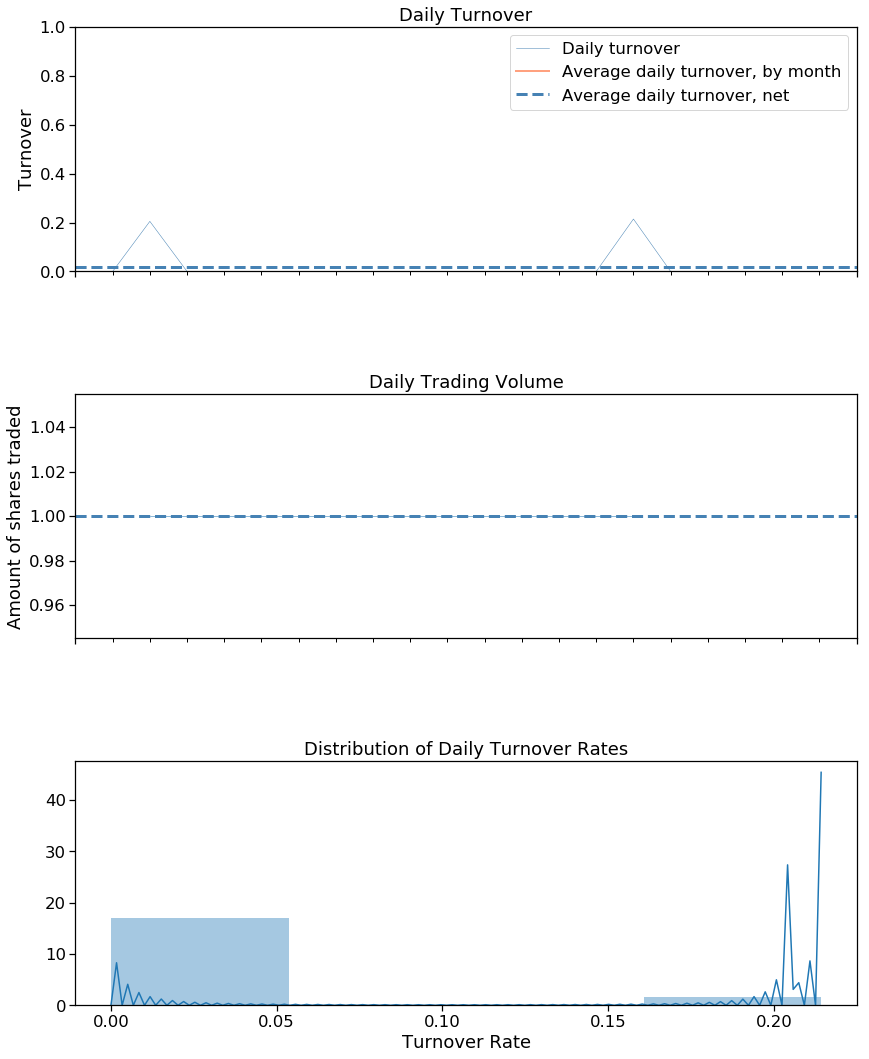

In [29]:
# pyfolio showtime
import pyfolio as pf
pf.create_full_tear_sheet(
    returns,
    positions=positions,
    transactions=transactions,
    gross_lev=gross_lev
    #live_start_date='2005-05-01',  # This date is sample specific
)

## Testing buy price

In [3]:
transactions

NameError: name 'transactions' is not defined